In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Đọc file CSV
file_path = '/home/ubuntu/1/BTL_Mining/final_data_first.csv'
data = pd.read_csv(file_path)

# Chia dữ liệu thành 80% và 20%
data_80, data_20 = train_test_split(data, test_size=0.2, random_state=42)

# Chia tiếp 20% thành 10% và 10%
data_10_1, data_10_2 = train_test_split(data_20, test_size=0.5, random_state=42)

# Lưu các file CSV
data_80.to_csv('/home/ubuntu/1/BTL_Mining/data_80.csv', index=False)
data_10_1.to_csv('/home/ubuntu/1/BTL_Mining/data_10_1.csv', index=False)
data_10_2.to_csv('/home/ubuntu/1/BTL_Mining/data_10_2.csv', index=False)

print("Dữ liệu đã được chia thành 3 file: data_80.csv, data_10_1.csv, data_10_2.csv")

Dữ liệu đã được chia thành 3 file: data_80.csv, data_10_1.csv, data_10_2.csv


In [2]:
import pandas as pd
from sklearn.impute import KNNImputer

def imputer(file_path_80, output_path):
    """
    Hàm thực hiện KNNImputer trên dữ liệu từ file 80% và lưu kết quả vào file mới.

    Parameters:
    - file_path_80: Đường dẫn tới file 80% dữ liệu (CSV).
    - output_path: Đường dẫn để lưu file sau khi xử lý (CSV).
    """
    # Đọc dữ liệu từ file 80%
    data_80 = pd.read_csv(file_path_80)

    # Kiểm tra và xử lý missing values bằng KNNImputer
    if data_80.isnull().values.any():
        imputer = KNNImputer(n_neighbors=5)  # Sử dụng 5 hàng gần nhất
        data_80_imputed = pd.DataFrame(imputer.fit_transform(data_80), columns=data_80.columns)
        print("Missing values đã được xử lý.")
    else:
        data_80_imputed = data_80
        print("Không có missing values trong dữ liệu.")

    # Lưu dữ liệu sau khi xử lý vào file mới
    data_80_imputed.to_csv(output_path, index=False)
    print(f"Dữ liệu đã được xử lý và lưu vào file: {output_path}")

# Sử dụng hàm imputer
file_path_80 = '/home/ubuntu/1/BTL_Mining/data_80.csv'
output_path = '/home/ubuntu/1/BTL_Mining/data_80_imputed.csv'
imputer(file_path_80, output_path)

Missing values đã được xử lý.
Dữ liệu đã được xử lý và lưu vào file: /home/ubuntu/1/BTL_Mining/data_80_imputed.csv


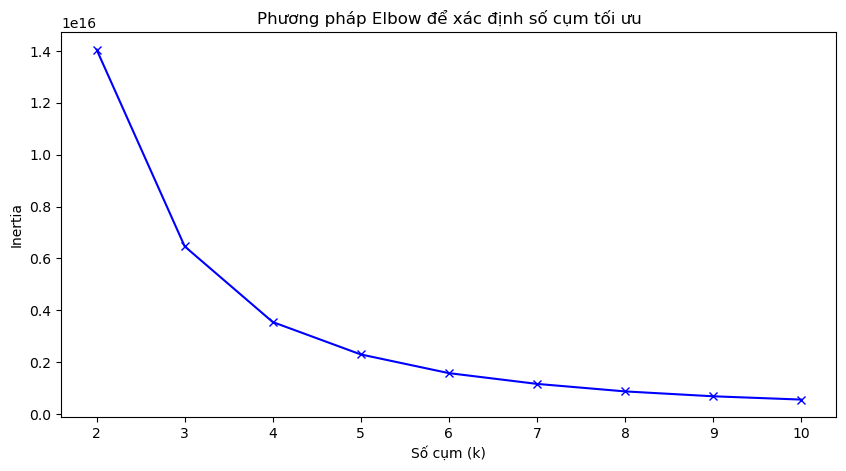

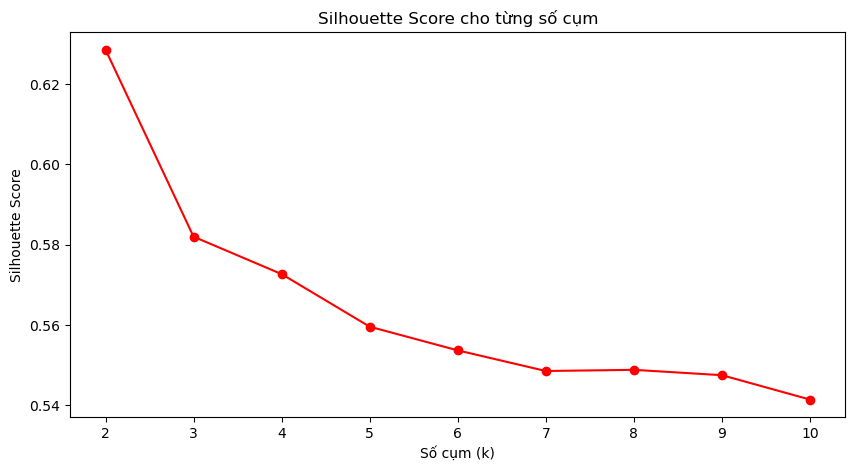

Số cụm tối ưu dựa trên Silhouette Score: 2
Số cụm (k) | Inertia | Silhouette Score
2          | 14047078345856304.00 | 0.63      
3          | 6465767608901946.00 | 0.58      
4          | 3551436042596067.00 | 0.57      
5          | 2303920219358823.00 | 0.56      
6          | 1584224162248032.50 | 0.55      
7          | 1169942400850520.50 | 0.55      
8          | 880639158912114.62 | 0.55      
9          | 692664663689997.75 | 0.55      
10         | 565556524561985.38 | 0.54      


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file 80%
file_path_80 = '/home/ubuntu/1/BTL_Mining/data_80_imputed.csv'
data_80 = pd.read_csv(file_path_80)

# Chỉ sử dụng các cột số
data_numeric = data_80.select_dtypes(include=['float64', 'int64'])

# Elbow Method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Số cụm từ 2 đến 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_numeric)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_numeric, labels))

# Vẽ đồ thị Elbow
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để xác định số cụm tối ưu')
plt.show()

# Vẽ đồ thị Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score cho từng số cụm')
plt.show()

# In ra số cụm với Silhouette Score cao nhất
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Số cụm tối ưu dựa trên Silhouette Score: {optimal_k}")

# In ra số điểm Inertia và Silhouette Score của từng cụm
print("Số cụm (k) | Inertia | Silhouette Score")
for k, inertia_value, silhouette_value in zip(K, inertia, silhouette_scores):
    print(f"{k:<10} | {inertia_value:<10.2f} | {silhouette_value:<10.2f}")

In [6]:
import pandas as pd
from sklearn.cluster import KMeans

# Đọc dữ liệu từ file 80% đã xử lý
file_path_80_imputed = '/home/ubuntu/1/BTL_Mining/data_80_imputed.csv'
data_80_imputed = pd.read_csv(file_path_80_imputed)

# Chỉ sử dụng các cột số
data_numeric = data_80_imputed.select_dtypes(include=['float64', 'int64'])

# Xây dựng mô hình K-Means với 2 cụm
kmeans = KMeans(n_clusters=2, random_state=42)
data_80_imputed['Cluster'] = kmeans.fit_predict(data_numeric)

# Lưu kết quả phân cụm vào file mới
output_path = '/home/ubuntu/1/BTL_Mining/data_80_clustered.csv'
data_80_imputed.to_csv(output_path, index=False)

print(f"Dữ liệu đã được phân cụm và lưu vào file: {output_path}")

Dữ liệu đã được phân cụm và lưu vào file: /home/ubuntu/1/BTL_Mining/data_80_clustered.csv


In [7]:
# Tách dữ liệu thành 2 cụm dựa trên cột 'Cluster'
cluster_0 = data_80_imputed[data_80_imputed['Cluster'] == 0]
cluster_1 = data_80_imputed[data_80_imputed['Cluster'] == 1]

# Lưu dữ liệu của từng cụm vào các file riêng biệt
cluster_0.to_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv', index=False)
cluster_1.to_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv', index=False)

print("Dữ liệu đã được tách thành 2 file: cluster_0.csv và cluster_1.csv")

Dữ liệu đã được tách thành 2 file: cluster_0.csv và cluster_1.csv


In [10]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# In ra tên các cột
print("Tên các cột trong file cluster_0:")
print(cluster_0.columns.tolist())

print("\nTên các cột trong file cluster_1:")
print(cluster_1.columns.tolist())

Tên các cột trong file cluster_0:
['id', 'pao2', 'paco2', 'spo2', 'pao2fio2ratio', 'totalco2', 'bicarbonate', 'baseexcess', 'ph', 'lactatebg', 'sepsis', 'hepatitis', 'liver_cirrhosis', 'ventricular_arrhythmia', 'atrial_fibrillation', 'pneumonia', 'ami', 'omi', 'pleural_effusion', 'valvular_disease', 'hypertension', 'anemia', 'ckd', 'stroke', 'copd', 'diabetes', 'aki', 'pe', 'angina_pectoris', 'age_at_admission', 'target', 'bmi', 'duration', 'gcs_min', 'gcs_unable', 'ntprobnp', 'ck_mb_lab', 'troponin_t', 'hematocrit', 'hemoglobin', 'platelet', 'wbc', 'rbc', 'aniongap', 'creatinine', 'bun', 'glucose', 'sodium', 'potassium', 'calcium', 'magnesium', 'chloride', 'inr', 'pt', 'ptt', 'basophils_abs', 'eosinophils_abs', 'lymphocytes_abs', 'monocytes_abs', 'neutrophils_abs', 'alt', 'alp', 'ast', 'bilirubin_total', 'sofa_24hours', 'sapsii', 'lods', 'urineoutput', 'heart_rate', 'resp_rate', 'temperature', 'gender_f', 'race_grouped_american_indian', 'race_grouped_asian', 'race_grouped_black_africa

In [9]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Chuẩn hóa tên các cột trực tiếp
cluster_0.columns = cluster_0.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w]', '_', regex=True)
cluster_1.columns = cluster_1.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w]', '_', regex=True)

# Ghi đè lại chính file gốc
cluster_0.to_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv', index=False)
cluster_1.to_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv', index=False)

print("Tên các cột đã được chuẩn hóa trực tiếp trên các file cluster_0.csv và cluster_1.csv")

Tên các cột đã được chuẩn hóa trực tiếp trên các file cluster_0.csv và cluster_1.csv


In [12]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Chuyển đổi cột 'target' từ float64 sang boolean
cluster_0['target'] = cluster_0['target'].apply(lambda x: bool(x))
cluster_1['target'] = cluster_1['target'].apply(lambda x: bool(x))

# Ghi đè lại chính file gốc
cluster_0.to_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv', index=False)
cluster_1.to_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv', index=False)

print("Cột 'target' đã được chuyển đổi sang kiểu boolean và lưu lại trong các file cluster_0.csv và cluster_1.csv")

Cột 'target' đã được chuyển đổi sang kiểu boolean và lưu lại trong các file cluster_0.csv và cluster_1.csv


In [13]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# In ra giá trị của cột 'target'
print("Giá trị cột 'target' trong file cluster_0:")
print(cluster_0['target'].head())  # In 5 giá trị đầu tiên (hoặc bỏ .head() để in toàn bộ)

print("\nGiá trị cột 'target' trong file cluster_1:")
print(cluster_1['target'].head())  # In 5 giá trị đầu tiên (hoặc bỏ .head() để in toàn bộ)

Giá trị cột 'target' trong file cluster_0:
0    False
1    False
2    False
3    False
4    False
Name: target, dtype: bool

Giá trị cột 'target' trong file cluster_1:
0    False
1    False
2    False
3    False
4    False
Name: target, dtype: bool


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Kết quả đánh giá cho cluster_0:
                 Model  Accuracy  Inference Time (s)
0        Decision Tree  0.877581            0.347422
1                  KNN  0.941003            0.005215
2  Logistic Regression  0.942478            3.086724
3          Naive Bayes  0.911504            0.005438
4             CatBoost  0.943953            3.527456


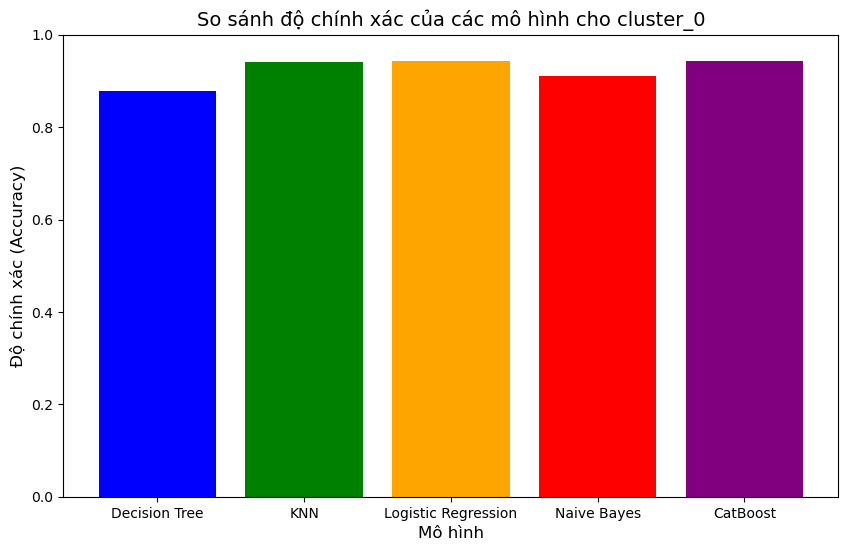

/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Kết quả đánh giá cho cluster_1:
                 Model  Accuracy  Inference Time (s)
0        Decision Tree  0.867347            0.157841
1                  KNN  0.925656            0.002548
2  Logistic Regression  0.927114            2.715780
3          Naive Bayes  0.905248            0.005106
4             CatBoost  0.922741            3.369047


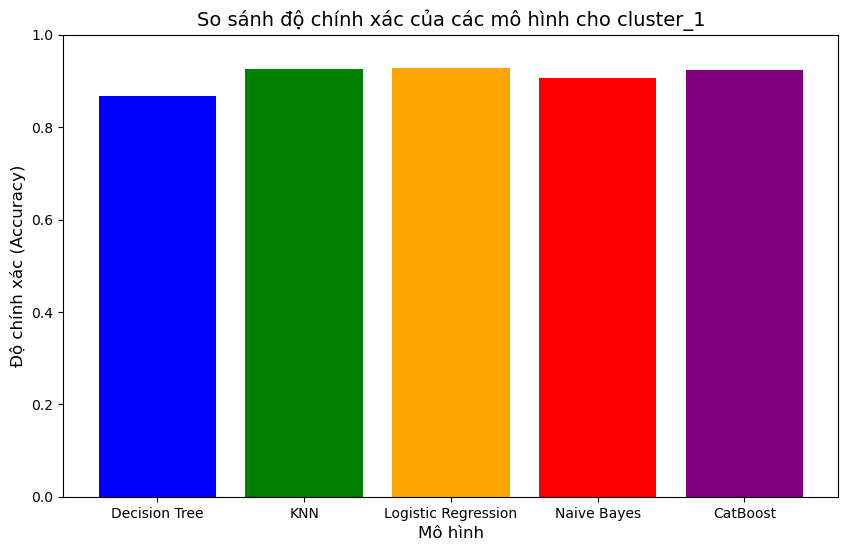

In [29]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

def build_and_evaluate_models(data, cluster_name):
    """
    Xây dựng và đánh giá các mô hình (Decision Tree, KNN, Logistic Regression, Naive Bayes, Neural Network)
    để dự đoán giá trị cột 'target', và hiển thị kết quả trong bảng.

    Parameters:
    - data: DataFrame chứa dữ liệu.
    - cluster_name: Tên cụm (cluster_0 hoặc cluster_1).

    Returns:
    - None
    """
    # Tách dữ liệu thành X (các cột còn lại) và y (cột target)
    X = data.drop(columns=['target'])
    y = data['target']

    # Chia dữ liệu thành tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Danh sách các mô hình
# Danh sách các mô hình
    models = {
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Logistic Regression": LogisticRegression(random_state=42, solver='saga', max_iter=1000),
        "Naive Bayes": GaussianNB(),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42)  # Thêm CatBoostClassifier
    }

    # Lưu trữ kết quả
    results = []

    # Huấn luyện và đánh giá từng mô hình
    for model_name, model in models.items():
        # Đo thời gian huấn luyện
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        # Dự đoán và tính độ chính xác
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Tính thời gian suy đoán
        inference_time = end_time - start_time

        # Lưu kết quả
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Inference Time (s)": inference_time
        })

    # Hiển thị kết quả dưới dạng bảng
    results_df = pd.DataFrame(results)
    print(f"Kết quả đánh giá cho {cluster_name}:")
    print(results_df)

    # Vẽ biểu đồ so sánh độ chính xác
    plt.figure(figsize=(10, 6))
    plt.bar(results_df["Model"], results_df["Accuracy"], color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.xlabel('Mô hình', fontsize=12)
    plt.ylabel('Độ chính xác (Accuracy)', fontsize=12)
    plt.title(f'So sánh độ chính xác của các mô hình cho {cluster_name}', fontsize=14)
    plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Xây dựng và đánh giá mô hình cho cluster_0
build_and_evaluate_models(cluster_0, "cluster_0")

# Xây dựng và đánh giá mô hình cho cluster_1
build_and_evaluate_models(cluster_1, "cluster_1")

In [23]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Đếm số giá trị True và False trong cột 'target' của cluster_0
print("Số giá trị True và False trong cột 'target' của file cluster_0:")
print(cluster_0['target'].value_counts())

# Đếm số giá trị True và False trong cột 'target' của cluster_1
print("\nSố giá trị True và False trong cột 'target' của file cluster_1:")
print(cluster_1['target'].value_counts())

Số giá trị True và False trong cột 'target' của file cluster_0:
target
False    3137
True      250
Name: count, dtype: int64

Số giá trị True và False trong cột 'target' của file cluster_1:
target
False    3160
True      266
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Tính hệ số tương quan với cột 'target' trong cluster_0
correlation_0 = cluster_0.corr()['target'].drop('target')  # Loại bỏ chính cột 'target'
top_5_corr_0 = correlation_0.abs().sort_values(ascending=False).head(5)  # Lấy top 5 giá trị lớn nhất (theo độ lớn tuyệt đối)
print("Top 5 cột có tương quan lớn nhất với 'target' trong cluster_0:")
print(top_5_corr_0)

# Tính hệ số tương quan với cột 'target' trong cluster_1
correlation_1 = cluster_1.corr()['target'].drop('target')  # Loại bỏ chính cột 'target'
top_5_corr_1 = correlation_1.abs().sort_values(ascending=False).head(5)  # Lấy top 5 giá trị lớn nhất (theo độ lớn tuyệt đối)
print("\nTop 5 cột có tương quan lớn nhất với 'target' trong cluster_1:")
print(top_5_corr_1)

Top 5 cột có tương quan lớn nhất với 'target' trong cluster_0:
sapsii                0.244029
lods                  0.207721
race_grouped_other    0.191741
lactatebg             0.177789
baseexcess            0.158961
Name: target, dtype: float64

Top 5 cột có tương quan lớn nhất với 'target' trong cluster_1:
race_grouped_other    0.176154
sapsii                0.176074
stroke                0.164574
lods                  0.163873
aniongap              0.131679
Name: target, dtype: float64


In [30]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Chỉ lấy các cột số
numeric_columns_0 = cluster_0.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_1 = cluster_1.select_dtypes(include=['float64', 'int64']).columns

# Tính trung bình của các cột số trong mỗi cụm
mean_0 = cluster_0[numeric_columns_0].mean()
mean_1 = cluster_1[numeric_columns_1].mean()

# Tính độ chênh lệch tuyệt đối giữa trung bình của hai cụm
mean_diff = (mean_0 - mean_1).abs()

# Sắp xếp theo độ chênh lệch giảm dần
mean_diff_sorted = mean_diff.sort_values(ascending=False)

# In ra top 5 cột có độ chênh lệch lớn nhất
print("Top 5 cột có giá trị khác biệt lớn nhất giữa cluster_0 và cluster_1:")
print(mean_diff_sorted.head(5))

Top 5 cột có giá trị khác biệt lớn nhất giữa cluster_0 và cluster_1:
id             4.974967e+06
ntprobnp       1.646927e+03
ast            2.152206e+01
urineoutput    1.841151e+01
alt            1.630728e+01
dtype: float64


In [4]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 62.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 115.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
import shap
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np

def extract_and_save_top_features(data, cluster_name, output_path):
    """
    Sử dụng SHAP để trích xuất top 20 feature quan trọng nhất và lưu vào file CSV.

    Parameters:
    - data: DataFrame chứa dữ liệu.
    - cluster_name: Tên cụm (cluster_0 hoặc cluster_1).
    - output_path: Đường dẫn để lưu file CSV chứa top 20 feature.

    Returns:
    - DataFrame chứa top 20 feature.
    """
    # Tách dữ liệu thành X (các cột còn lại) và y (cột target)
    X = data.drop(columns=['target'])
    y = data['target']

    # Chia dữ liệu thành tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình CatBoostClassifier
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    # Sử dụng SHAP để tính toán giá trị Shapley
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)

    # Tính giá trị trung bình tuyệt đối của SHAP cho từng feature
    shap_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='importance', ascending=False)

    # Lấy top 20 feature
    top_20_features = shap_importance['feature'].head(20).tolist()
    print(f"Top 20 feature quan trọng nhất cho {cluster_name}:")
    print(top_20_features)

    # Lọc dữ liệu chỉ với top 20 feature và cột target
    filtered_data = data[top_20_features + ['target']]

    # Lưu vào file CSV
    filtered_data.to_csv(output_path, index=False)
    print(f"Dữ liệu với top 20 feature đã được lưu vào: {output_path}")

    return filtered_data

In [8]:
# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Trích xuất top 20 feature và lưu vào file mới
filtered_cluster_0 = extract_and_save_top_features(cluster_0, "cluster_0", '/home/ubuntu/1/BTL_Mining/filtered_cluster_0.csv')
filtered_cluster_1 = extract_and_save_top_features(cluster_1, "cluster_1", '/home/ubuntu/1/BTL_Mining/filtered_cluster_1.csv')

Top 20 feature quan trọng nhất cho cluster_0:
['sapsii', 'race_grouped_other', 'age_at_admission', 'duration', 'wbc', 'urineoutput', 'lods', 'lactatebg', 'stroke', 'heart_rate', 'lymphocytes_abs', 'resp_rate', 'calcium', 'pao2', 'eosinophils_abs', 'anemia', 'baseexcess', 'potassium', 'neutrophils_abs', 'ptt']
Dữ liệu với top 20 feature đã được lưu vào: /home/ubuntu/1/BTL_Mining/filtered_cluster_0.csv
Top 20 feature quan trọng nhất cho cluster_1:
['duration', 'pao2', 'race_grouped_other', 'age_at_admission', 'lactatebg', 'stroke', 'sapsii', 'aki', 'urineoutput', 'aniongap', 'lods', 'bmi', 'wbc', 'resp_rate', 'race_grouped_black_african', 'pt', 'diabetes', 'alt', 'anemia', 'ptt']
Dữ liệu với top 20 feature đã được lưu vào: /home/ubuntu/1/BTL_Mining/filtered_cluster_1.csv


In [4]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from catboost import CatBoostClassifier

def train_and_evaluate_catboost_auroc(data, cluster_name):
    """
    Huấn luyện và đánh giá mô hình CatBoostClassifier trên tập dữ liệu với metric AUROC và thời gian infer.

    Parameters:
    - data: DataFrame chứa dữ liệu.
    - cluster_name: Tên cụm (cluster_0 hoặc cluster_1).

    Returns:
    - auroc: AUROC của mô hình.
    - inference_time: Thời gian infer trung bình trên mỗi mẫu.
    """
    # Tách dữ liệu thành X (các cột feature) và y (cột target)
    X = data.drop(columns=['target'])
    y = data['target']

    # Chia dữ liệu thành tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Khởi tạo và huấn luyện mô hình CatBoostClassifier
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    # Dự đoán xác suất trên tập test và đo thời gian infer
    start_time = time.time()
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    end_time = time.time()

    # Tính thời gian infer trung bình trên mỗi mẫu
    inference_time = (end_time - start_time) / len(X_test)

    # Đánh giá AUROC
    auroc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUROC của mô hình trên {cluster_name}: {auroc:.4f}")
    print(f"Thời gian infer trung bình trên mỗi mẫu: {inference_time:.6f} giây")
    print(f"Báo cáo phân loại cho {cluster_name}:\n")
    print(classification_report(y_test, model.predict(X_test)))
    return auroc, inference_time

# Đọc dữ liệu đầy đủ và dữ liệu đã trích xuất
cluster_0_full = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1_full = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')
filtered_cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/filtered_cluster_0.csv')
filtered_cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/filtered_cluster_1.csv')

# Huấn luyện và đánh giá trên dữ liệu đầy đủ
auroc_full_0, infer_time_full_0 = train_and_evaluate_catboost_auroc(cluster_0_full, "cluster_0 (full)")
auroc_full_1, infer_time_full_1 = train_and_evaluate_catboost_auroc(cluster_1_full, "cluster_1 (full)")

# Huấn luyện và đánh giá trên dữ liệu đã trích xuất
auroc_filtered_0, infer_time_filtered_0 = train_and_evaluate_catboost_auroc(filtered_cluster_0, "cluster_0 (filtered)")
auroc_filtered_1, infer_time_filtered_1 = train_and_evaluate_catboost_auroc(filtered_cluster_1, "cluster_1 (filtered)")

# So sánh kết quả
print("\nSo sánh AUROC và thời gian infer:")
print(f"Cluster_0 - Full: AUROC = {auroc_full_0:.4f}, Infer Time = {infer_time_full_0:.6f} giây")
print(f"Cluster_0 - Filtered: AUROC = {auroc_filtered_0:.4f}, Infer Time = {infer_time_filtered_0:.6f} giây")
print(f"Cluster_1 - Full: AUROC = {auroc_full_1:.4f}, Infer Time = {infer_time_full_1:.6f} giây")
print(f"Cluster_1 - Filtered: AUROC = {auroc_filtered_1:.4f}, Infer Time = {infer_time_filtered_1:.6f} giây")

AUROC của mô hình trên cluster_0 (full): 0.8484
Thời gian infer trung bình trên mỗi mẫu: 0.000009 giây
Báo cáo phân loại cho cluster_0 (full):

              precision    recall  f1-score   support

       False       0.95      1.00      0.97       639
        True       0.60      0.08      0.14        39

    accuracy                           0.94       678
   macro avg       0.77      0.54      0.55       678
weighted avg       0.93      0.94      0.92       678

AUROC của mô hình trên cluster_1 (full): 0.8032
Thời gian infer trung bình trên mỗi mẫu: 0.000009 giây
Báo cáo phân loại cho cluster_1 (full):

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       636
        True       0.00      0.00      0.00        50

    accuracy                           0.92       686
   macro avg       0.46      0.50      0.48       686
weighted avg       0.86      0.92      0.89       686

AUROC của mô hình trên cluster_0 (filtered): 0.8305
Thời g

In [5]:
import pandas as pd
import shap
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np

def extract_and_save_top_features(data, cluster_name, output_data_path, output_features_path):
    """
    Sử dụng SHAP để trích xuất top 20 feature quan trọng nhất và lưu vào file CSV.

    Parameters:
    - data: DataFrame chứa dữ liệu.
    - cluster_name: Tên cụm (cluster_0 hoặc cluster_1).
    - output_data_path: Đường dẫn để lưu file CSV chứa dữ liệu với top 20 feature.
    - output_features_path: Đường dẫn để lưu file CSV chứa danh sách top 20 feature.

    Returns:
    - DataFrame chứa top 20 feature.
    """
    # Tách dữ liệu thành X (các cột còn lại) và y (cột target)
    X = data.drop(columns=['target'])
    y = data['target']

    # Chia dữ liệu thành tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình CatBoostClassifier
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    # Sử dụng SHAP để tính toán giá trị Shapley
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)

    # Tính giá trị trung bình tuyệt đối của SHAP cho từng feature
    shap_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='importance', ascending=False)

    # Lấy top 20 feature
    top_20_features = shap_importance['feature'].head(20).tolist()
    print(f"Top 20 feature quan trọng nhất cho {cluster_name}:")
    print(top_20_features)

    # Lưu danh sách top 20 feature vào file CSV
    pd.DataFrame({'feature': top_20_features}).to_csv(output_features_path, index=False)
    print(f"Danh sách top 20 feature đã được lưu vào: {output_features_path}")

    # Lọc dữ liệu chỉ với top 20 feature và cột target
    filtered_data = data[top_20_features + ['target']]

    # Lưu dữ liệu vào file CSV
    filtered_data.to_csv(output_data_path, index=False)
    print(f"Dữ liệu với top 20 feature đã được lưu vào: {output_data_path}")

    return filtered_data

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# Trích xuất top 20 feature và lưu vào file mới
filtered_cluster_0 = extract_and_save_top_features(
    cluster_0, 
    "cluster_0", 
    '/home/ubuntu/1/BTL_Mining/filtered_cluster_0.csv', 
    '/home/ubuntu/1/BTL_Mining/top_features_cluster_0.csv'
)

filtered_cluster_1 = extract_and_save_top_features(
    cluster_1, 
    "cluster_1", 
    '/home/ubuntu/1/BTL_Mining/filtered_cluster_1.csv', 
    '/home/ubuntu/1/BTL_Mining/top_features_cluster_1.csv'
)

/home/ubuntu/anaconda3/envs/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Top 20 feature quan trọng nhất cho cluster_0:
['sapsii', 'race_grouped_other', 'age_at_admission', 'duration', 'wbc', 'urineoutput', 'lods', 'lactatebg', 'stroke', 'heart_rate', 'lymphocytes_abs', 'resp_rate', 'calcium', 'pao2', 'eosinophils_abs', 'anemia', 'baseexcess', 'potassium', 'neutrophils_abs', 'ptt']
Danh sách top 20 feature đã được lưu vào: /home/ubuntu/1/BTL_Mining/top_features_cluster_0.csv
Dữ liệu với top 20 feature đã được lưu vào: /home/ubuntu/1/BTL_Mining/filtered_cluster_0.csv
Top 20 feature quan trọng nhất cho cluster_1:
['duration', 'pao2', 'race_grouped_other', 'age_at_admission', 'lactatebg', 'stroke', 'sapsii', 'aki', 'urineoutput', 'aniongap', 'lods', 'bmi', 'wbc', 'resp_rate', 'race_grouped_black_african', 'pt', 'diabetes', 'alt', 'anemia', 'ptt']
Danh sách top 20 feature đã được lưu vào: /home/ubuntu/1/BTL_Mining/top_features_cluster_1.csv
Dữ liệu với top 20 feature đã được lưu vào: /home/ubuntu/1/BTL_Mining/filtered_cluster_1.csv


In [8]:
import pandas as pd

# Đọc dữ liệu từ file CSV
input_file = '/home/ubuntu/1/BTL_Mining/cluster_1.csv'
df = pd.read_csv(input_file)

# Loại bỏ cột 'id' (không phân biệt chữ hoa chữ thường)
cols = [col for col in df.columns if col.lower() != 'id']
df = df[cols]

# Lưu dữ liệu mới vào file CSV
output_file = '/home/ubuntu/1/BTL_Mining/cluster_1.csv'
df.to_csv(output_file, index=False)

print(f"File đã được lưu mà không chứa cột 'id': {output_file}")

File đã được lưu mà không chứa cột 'id': /home/ubuntu/1/BTL_Mining/cluster_1.csv


In [9]:
import pandas as pd
from sklearn.impute import KNNImputer

# Đọc dữ liệu gốc (không có cột ID)
data_file = '/home/ubuntu/1/BTL_Mining/data_80_imputed_no_id.csv'
df = pd.read_csv(data_file)

# Ví dụ: input_row là một dict hoặc Series với các trường giống df.columns, có thể thiếu giá trị
# Bạn có thể thay đổi giá trị dưới đây cho phù hợp với trường hợp thực tế
input_row = {
    'pao2': 100.0,
    'paco2': None,  # thiếu giá trị
    'spo2': 98.0,
    # ... điền các trường khác, có thể thiếu một vài trường ...
}
# Đảm bảo input_row có đủ tất cả các cột, nếu thiếu thì thêm giá trị None
for col in df.columns:
    if col not in input_row:
        input_row[col] = None

# Chuyển input_row thành DataFrame 1 hàng, đúng thứ tự cột
input_df = pd.DataFrame([input_row])[df.columns]

# Ghép input vào cuối dữ liệu gốc để cùng impute
concat_df = pd.concat([df, input_df], ignore_index=True)

# KNNImputer với n_neighbors=5
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(concat_df)

# Lấy lại hàng cuối cùng (input đã được impute)
imputed_input = pd.DataFrame([imputed[-1]], columns=df.columns)

print("Input sau khi đã được KNNImputer xử lý missing value:")
print(imputed_input)

Input sau khi đã được KNNImputer xử lý missing value:
    pao2  paco2  spo2  pao2fio2ratio  totalco2  bicarbonate  baseexcess  \
0  100.0   61.0  98.0     174.571429      32.4         28.2         3.0   

      ph  lactatebg  sepsis  ...  heart_rate  resp_rate  temperature  \
0  7.334      2.236     1.0  ...        81.0       21.2       36.936   

   gender_F  race_grouped_AMERICAN_INDIAN  race_grouped_ASIAN  \
0       0.6                           0.0                 0.2   

   race_grouped_BLACK/AFRICAN  race_grouped_HISPANIC  race_grouped_OTHER  \
0                         0.0                    0.2                 0.4   

   race_grouped_WHITE  
0                 0.2  

[1 rows x 77 columns]


/tmp/ipykernel_2016118/1902015810.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_df = pd.concat([df, input_df], ignore_index=True)


In [10]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('/home/ubuntu/1/BTL_Mining/data_10_1.csv')

# Tìm chỉ số của hàng đầu tiên có missing value
missing_idx = df.isnull().any(axis=1)

# Lấy hàng đầu tiên bị thiếu giá trị
example_row = df[missing_idx].head(1)

# Lưu ra file example.csv nếu tìm thấy
if not example_row.empty:
    example_row.to_csv('/home/ubuntu/1/BTL_Mining/example.csv', index=False)
    print("Đã lưu 1 hàng có missing value vào example.csv")
else:
    print("Không tìm thấy hàng nào bị thiếu giá trị.")

Đã lưu 1 hàng có missing value vào example.csv


In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import re
import warnings

warnings.filterwarnings("ignore")

def normalize_col(col):
    return re.sub(r'\W+', '_', col.lower())

def infer_from_row_dict(input_row):
    data_file = '/home/ubuntu/1/BTL_Mining/data_80_imputed_no_id.csv'
    df = pd.read_csv(data_file)
    for col in df.columns:
        if col not in input_row:
            input_row[col] = None
    input_df = pd.DataFrame([input_row])[df.columns]
    concat_df = pd.concat([df, input_df], ignore_index=True)
    imputer = KNNImputer(n_neighbors=5)
    imputed = imputer.fit_transform(concat_df)
    imputed_input = pd.DataFrame([imputed[-1]], columns=df.columns)

    cluster0_path = '/home/ubuntu/1/BTL_Mining/cluster_0.csv'
    cluster1_path = '/home/ubuntu/1/BTL_Mining/cluster_1.csv'
    cluster_0 = pd.read_csv(cluster0_path)
    cluster_1 = pd.read_csv(cluster1_path)
    drop_cols = [col for col in ['target', 'cluster'] if col in cluster_0.columns]
    cluster_0 = cluster_0.drop(columns=drop_cols, errors='ignore')
    cluster_1 = cluster_1.drop(columns=drop_cols, errors='ignore')
    features = [col for col in imputed_input.columns if col in cluster_0.columns]
    centroid_0 = cluster_0[features].mean()
    centroid_1 = cluster_1[features].mean()
    input_values = imputed_input[features].iloc[0]
    dist_0 = np.linalg.norm(input_values - centroid_0)
    dist_1 = np.linalg.norm(input_values - centroid_1)
    assigned_cluster = 0 if dist_0 < dist_1 else 1

    if assigned_cluster == 0:
        features_file = '/home/ubuntu/1/BTL_Mining/top_features_cluster_0.csv'
        model_path = '/home/ubuntu/1/BTL_Mining/catboost_model_cluster_0.cbm'
    else:
        features_file = '/home/ubuntu/1/BTL_Mining/top_features_cluster_1.csv'
        model_path = '/home/ubuntu/1/BTL_Mining/catboost_model_cluster_1.cbm'
    top_features = pd.read_csv(features_file)['feature'].tolist()
    columns_to_save = top_features
    extracted = imputed_input[columns_to_save].copy()
    extracted['cluster'] = assigned_cluster

    model = CatBoostClassifier()
    model.load_model(model_path)
    model_features = model.feature_names_
    input_cols_norm = {normalize_col(col): col for col in extracted.columns}
    model_features_norm = {normalize_col(feat): feat for feat in model_features}
    rename_dict = {}
    for norm_feat, feat in model_features_norm.items():
        if norm_feat in input_cols_norm:
            rename_dict[input_cols_norm[norm_feat]] = feat
    X = extracted.rename(columns=rename_dict)
    if 'cluster' in X.columns:
        X = X.drop(columns=['cluster'])
    for feat in model_features:
        if feat not in X.columns:
            X[feat] = 0
    X = X[model_features]
    # Lấy xác suất dự đoán class 1
    proba = model.predict_proba(X)[0][1]
    return proba

if __name__ == "__main__":
    input_csv = '/home/ubuntu/1/BTL_Mining/data_10_1.csv'
    df = pd.read_csv(input_csv)
    drop_cols = [col for col in df.columns if col.lower() == 'id']
    df = df.drop(columns=drop_cols, errors='ignore')
    y_true = []
    y_score = []
    for idx, row in df.iterrows():
        input_row = row.drop('target').to_dict()
        target = row['target']
        proba = infer_from_row_dict(input_row)
        y_true.append(target)
        y_score.append(proba)
        print(f"Row {idx}: target={target}, predict_proba={proba:.4f}")
    # Tính AUROC
    auroc = roc_auc_score(y_true, y_score)
    # Chuyển xác suất thành nhãn (ngưỡng 0.5)
    y_pred = [1 if s >= 0.2 else 0 for s in y_score]
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"\nAUROC trên toàn bộ tập: {auroc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

Row 0: target=0.0, predict_proba=0.2729
Row 1: target=0.0, predict_proba=0.8091
Row 2: target=0.0, predict_proba=0.0111
Row 3: target=0.0, predict_proba=0.8036
Row 4: target=0.0, predict_proba=0.2470
Row 5: target=0.0, predict_proba=0.2977
Row 6: target=0.0, predict_proba=0.0357
Row 7: target=0.0, predict_proba=0.6820
Row 8: target=0.0, predict_proba=0.6116
Row 9: target=0.0, predict_proba=0.5037
Row 10: target=0.0, predict_proba=0.8633
Row 11: target=0.0, predict_proba=0.6354
Row 12: target=0.0, predict_proba=0.2426
Row 13: target=0.0, predict_proba=0.7693
Row 14: target=0.0, predict_proba=0.7454
Row 15: target=0.0, predict_proba=0.3606
Row 16: target=0.0, predict_proba=0.5239
Row 17: target=0.0, predict_proba=0.8358
Row 18: target=0.0, predict_proba=0.8444
Row 19: target=0.0, predict_proba=0.0433
Row 20: target=0.0, predict_proba=0.2188
Row 21: target=0.0, predict_proba=0.5040
Row 22: target=0.0, predict_proba=0.9062
Row 23: target=0.0, predict_proba=0.4178
Row 24: target=0.0, predic

In [15]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

# In phân phối giá trị trong cột 'target' của từng file
print("Phân phối giá trị cột 'target' trong cluster_0.csv:")
print(cluster_0['target'].value_counts())
print("\nPhân phối giá trị cột 'target' trong cluster_1.csv:")
print(cluster_1['target'].value_counts())

Phân phối giá trị cột 'target' trong cluster_0.csv:
target
False    3137
True      250
Name: count, dtype: int64

Phân phối giá trị cột 'target' trong cluster_1.csv:
target
False    3160
True      266
Name: count, dtype: int64


In [16]:
import pandas as pd

# Đọc dữ liệu từ các file cluster
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1.csv')

def balance_by_downsampling(df, target_col='target'):
    # Đếm số lượng mỗi lớp
    counts = df[target_col].value_counts()
    min_count = counts.min()
    # Lấy mẫu ngẫu nhiên cho mỗi lớp bằng số lượng nhỏ nhất
    df_true = df[df[target_col] == True].sample(n=min_count, random_state=42)
    df_false = df[df[target_col] == False].sample(n=min_count, random_state=42)
    # Ghép lại và shuffle
    balanced_df = pd.concat([df_true, df_false]).sample(frac=1, random_state=42).reset_index(drop=True)
    return balanced_df

# Downsampling cho từng file
balanced_0 = balance_by_downsampling(cluster_0)
balanced_1 = balance_by_downsampling(cluster_1)

# Lưu ra file mới
balanced_0.to_csv('/home/ubuntu/1/BTL_Mining/cluster_0_balanced.csv', index=False)
balanced_1.to_csv('/home/ubuntu/1/BTL_Mining/cluster_1_balanced.csv', index=False)

print("Đã lưu 2 file cân bằng: cluster_0_balanced.csv và cluster_1_balanced.csv")
print("Phân phối mới cluster_0_balanced.csv:")
print(balanced_0['target'].value_counts())
print("Phân phối mới cluster_1_balanced.csv:")
print(balanced_1['target'].value_counts())

Đã lưu 2 file cân bằng: cluster_0_balanced.csv và cluster_1_balanced.csv
Phân phối mới cluster_0_balanced.csv:
target
False    250
True     250
Name: count, dtype: int64
Phân phối mới cluster_1_balanced.csv:
target
True     266
False    266
Name: count, dtype: int64


In [17]:
import pandas as pd
import shap
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Đọc dữ liệu đã cân bằng
balanced_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0_balanced.csv')
balanced_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1_balanced.csv')

def extract_top_features_with_shap(data, cluster_name, output_path, top_n=20):
    X = data.drop(columns=['target'])
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_train, y_train)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)
    shap_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='importance', ascending=False)
    top_features = shap_importance['feature'].head(top_n).tolist()
    print(f"Top {top_n} đặc trưng quan trọng nhất cho {cluster_name}:")
    print(top_features)
    # Lưu ra file
    pd.DataFrame({'feature': top_features}).to_csv(output_path, index=False)
    print(f"Đã lưu vào {output_path}")
    return top_features

# Trích xuất và lưu top 20 đặc trưng cho từng cluster
top_features_0 = extract_top_features_with_shap(
    balanced_0, "cluster_0_balanced", "/home/ubuntu/1/BTL_Mining/top_features_cluster_0.csv"
)
top_features_1 = extract_top_features_with_shap(
    balanced_1, "cluster_1_balanced", "/home/ubuntu/1/BTL_Mining/top_features_cluster_1.csv"
)

Top 20 đặc trưng quan trọng nhất cho cluster_0_balanced:
['sapsii', 'race_grouped_other', 'duration', 'stroke', 'lods', 'pao2', 'age_at_admission', 'lymphocytes_abs', 'urineoutput', 'eosinophils_abs', 'basophils_abs', 'diabetes', 'aniongap', 'neutrophils_abs', 'glucose', 'potassium', 'lactatebg', 'spo2', 'bilirubin_total', 'calcium']
Đã lưu vào /home/ubuntu/1/BTL_Mining/top_features_cluster_0.csv
Top 20 đặc trưng quan trọng nhất cho cluster_1_balanced:
['race_grouped_other', 'stroke', 'sapsii', 'duration', 'urineoutput', 'age_at_admission', 'calcium', 'lods', 'aniongap', 'race_grouped_black_african', 'lactatebg', 'pao2', 'resp_rate', 'gcs_unable', 'sodium', 'pt', 'glucose', 'eosinophils_abs', 'alt', 'bmi']
Đã lưu vào /home/ubuntu/1/BTL_Mining/top_features_cluster_1.csv


In [18]:
import pandas as pd

# Đọc dữ liệu đã cân bằng
cluster_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_0_balanced.csv')
cluster_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/cluster_1_balanced.csv')

# Đọc danh sách các cột quan trọng từ file
top_features_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/top_features_cluster_0.csv')['feature'].tolist()
top_features_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/top_features_cluster_1.csv')['feature'].tolist()

# Lấy ra các cột quan trọng + cột target
filtered_0 = cluster_0[top_features_0 + ['target']]
filtered_1 = cluster_1[top_features_1 + ['target']]

# Lưu ra file mới nếu muốn
filtered_0.to_csv('/home/ubuntu/1/BTL_Mining/filtered_cluster_0_balanced.csv', index=False)
filtered_1.to_csv('/home/ubuntu/1/BTL_Mining/filtered_cluster_1_balanced.csv', index=False)

print("Đã lưu 2 file chỉ chứa các cột quan trọng:")
print("/home/ubuntu/1/BTL_Mining/filtered_cluster_0_balanced.csv")
print("/home/ubuntu/1/BTL_Mining/filtered_cluster_1_balanced.csv")

Đã lưu 2 file chỉ chứa các cột quan trọng:
/home/ubuntu/1/BTL_Mining/filtered_cluster_0_balanced.csv
/home/ubuntu/1/BTL_Mining/filtered_cluster_1_balanced.csv


In [20]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, classification_report

# Đọc dữ liệu đã lọc các cột quan trọng
filtered_0 = pd.read_csv('/home/ubuntu/1/BTL_Mining/filtered_cluster_0_balanced.csv')
filtered_1 = pd.read_csv('/home/ubuntu/1/BTL_Mining/filtered_cluster_1_balanced.csv')

def train_catboost_and_report_save(data, cluster_name, model_path):
    X = data.drop(columns=['target'])
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_train, y_train)
    # Lưu model
    model.save_model(model_path)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    auroc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{cluster_name}:")
    print(f"AUROC: {auroc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print(f"Đã lưu model vào: {model_path}")

# Huấn luyện, in chỉ số và lưu model cho từng cluster
train_catboost_and_report_save(
    filtered_0, 
    "CatBoost filtered_cluster_0_balanced", 
    "/home/ubuntu/1/BTL_Mining/catboost_model_cluster_0.cbm"
)
train_catboost_and_report_save(
    filtered_1, 
    "CatBoost filtered_cluster_1_balanced", 
    "/home/ubuntu/1/BTL_Mining/catboost_model_cluster_1.cbm"
)


CatBoost filtered_cluster_0_balanced:
AUROC: 0.8698
Recall: 0.8372
Precision: 0.7347
F1-score: 0.7826
Classification report:
              precision    recall  f1-score   support

       False       0.86      0.77      0.81        57
        True       0.73      0.84      0.78        43

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

Đã lưu model vào: /home/ubuntu/1/BTL_Mining/catboost_model_cluster_0.cbm

CatBoost filtered_cluster_1_balanced:
AUROC: 0.7612
Recall: 0.6984
Precision: 0.7586
F1-score: 0.7273
Classification report:
              precision    recall  f1-score   support

       False       0.61      0.68      0.65        44
        True       0.76      0.70      0.73        63

    accuracy                           0.69       107
   macro avg       0.69      0.69      0.69       107
weighted avg       0.70      0.69      0.69       107

Đã lưu model vào: /ho